# MNIST Julia ODSC

In [2]:
using Flux, Flux.Data.MNIST, Images

In [3]:
labels = MNIST.labels();
images = MNIST.images();

In [4]:
length(labels)

60000

,,,,

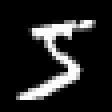
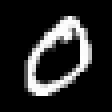
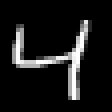
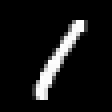
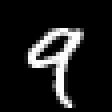

In [5]:
images[1:5]

In [8]:
size(images)

(60000,)

In [6]:
labels[1:5]'

1×5 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 5  0  4  1  9

In [7]:
typeof(images[1])

Array{Gray{Normed{UInt8,8}},2}

In [9]:
n_inputs = unique(length.(images))[]

784

In [10]:
n_outputs = unique(labels)

10-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 3
 6
 7
 8

In [11]:
preprocess(img) = vec(Float64.(img))

preprocess (generic function with 1 method)

In [12]:
xs = preprocess.(images[1:5000]);

In [13]:
size(xs)

(5000,)

In [14]:
ys = [Flux.onehot(label, 0:9) for label in labels[1:5000]];

In [15]:
function create_batch(r)
    xs = [preprocess(img) for img in images[r]]|>gpu
    ys = [Flux.onehot(label, 0:9) for label in labels[r]]|>gpu
    return (Flux.batch(xs), Flux.batch(ys))
end

create_batch (generic function with 1 method)

In [16]:
trainbatch = create_batch(1:5000)

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [17]:
testbatch = create_batch(5001:10000);

In [20]:
size(trainbatch[1])

(784, 5000)

# Model

In [20]:
model = Chain(Dense(784, 10, identity), softmax)

Chain(Dense(784, 10), softmax)

In [21]:
L(x,y) = Flux.crossentropy(model(x), y)

L (generic function with 1 method)

In [22]:
opt = Descent()

Descent(0.1)

In [23]:
params(model)

Params([Float32[-0.084843464 0.039534904 … -0.029588541 -0.08460639; 0.012732206 -0.025342152 … -0.05791154 -0.017800052; … ; -0.0055305017 0.086157896 … -0.059229393 0.020094594; -0.073319346 -0.030272214 … -0.06553008 -0.015082562], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [24]:
@time Flux.train!(L, params(model), [trainbatch], opt)
# @time Flux.train!(L, params(model), [trainbatch], opt)

  4.465140 seconds (32.59 M allocations: 1014.885 MiB, 3.78% gc time)


## Callback

In [25]:
callback() = @show(L(trainbatch...))

callback (generic function with 1 method)

In [28]:
Flux.train!(L, params(model), Iterators.repeated(trainbatch, 3), opt; cb = callback)

L(trainbatch...) = 1.997006f0
L(trainbatch...) = 1.9132628f0
L(trainbatch...) = 1.8364347f0


In [29]:
Flux.train!(L, params(model), Iterators.repeated(trainbatch, 40), opt; cb = Flux.throttle(callback, 1))

L(trainbatch...) = 1.7655765f0
L(trainbatch...) = 1.5311961f0
L(trainbatch...) = 1.357262f0
L(trainbatch...) = 1.2255579f0
L(trainbatch...) = 1.1234244f0
L(trainbatch...) = 1.0423315f0
L(trainbatch...) = 0.97654295f0
L(trainbatch...) = 0.92214507f0
L(trainbatch...) = 0.8764144f0
L(trainbatch...) = 0.8374125f0


In [33]:
L(testbatch...)

0.8385931f0

In [34]:
using Printf
function show_loss()
    train_loss = L(trainbatch...)
    test_loss  = L(testbatch...)
    @printf("train loss = %.3f, test loss = %.3f\n", train_loss, test_loss)
end

show_loss (generic function with 1 method)

In [35]:
Flux.train!(L, params(model), Iterators.repeated(trainbatch, 100), opt;
            cb = Flux.throttle(show_loss, 1))

train loss = 0.804, test loss = 0.831
train loss = 0.774, test loss = 0.803
train loss = 0.748, test loss = 0.778
train loss = 0.725, test loss = 0.756
train loss = 0.705, test loss = 0.736
train loss = 0.686, test loss = 0.718
train loss = 0.669, test loss = 0.702
train loss = 0.654, test loss = 0.688
train loss = 0.640, test loss = 0.674
train loss = 0.627, test loss = 0.662
train loss = 0.615, test loss = 0.651
train loss = 0.604, test loss = 0.640
train loss = 0.593, test loss = 0.630
train loss = 0.584, test loss = 0.621
train loss = 0.575, test loss = 0.613
train loss = 0.566, test loss = 0.605
train loss = 0.558, test loss = 0.597
train loss = 0.551, test loss = 0.590
train loss = 0.543, test loss = 0.584
train loss = 0.537, test loss = 0.577
train loss = 0.530, test loss = 0.571
train loss = 0.524, test loss = 0.566
train loss = 0.518, test loss = 0.560
train loss = 0.513, test loss = 0.555


InterruptException: InterruptException:

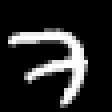

7

10-element Array{Float32,1}:
 0.0040588616
 0.0006992841
 0.059435066
 0.0036682223
 0.045614187
 0.0031717326
 0.013208977
 0.7564537
 0.03998523
 0.07370473

In [36]:
i = 5001
display(images[i])
display(labels[i])
model(preprocess(images[i]))

In [37]:
prediction(i) = findmax(model(preprocess(images[i])))[2]-1 # returns (max_value, index)

prediction (generic function with 1 method)

In [38]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000


0.8782

In [39]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.8634

# Better model

In [50]:
using CUDAapi
if has_cuda()
    @info "CUDA is on"
    import CuArrays
    CuArrays.allowscalar(false)
end

┌ Info: CUDA is on
└ @ Main In[50]:3


In [51]:
model = Chain(Dense(784, 20, relu),
              Dense(20, 10, identity), softmax) |>gpu

Chain(Dense(784, 20, relu), Dense(20, 10), softmax)

In [52]:
L(x,y) = Flux.crossentropy(model(x), y)|>gpu

L (generic function with 1 method)

In [62]:
opt = ADAMW()|>gpu

Flux.Optimise.Optimiser(Any[ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()), WeightDecay(0)])

In [63]:
@time Flux.train!(L, params(model), [trainbatch], opt)
# @time Flux.train!(L, params(model), [trainbatch], opt)

GPUCompiler.KernelError: GPU compilation of kernel broadcast(CuArrays.CuKernelContext, CUDAnative.CuDeviceArray{Float32,2,CUDAnative.AS.Global}, Base.Broadcast.Broadcasted{Nothing,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}},typeof(*),Tuple{Base.Broadcast.Extruded{Flux.OneHotMatrix{Array{Flux.OneHotVector,1}},Tuple{Bool,Bool},Tuple{Int64,Int64}},Base.Broadcast.Extruded{CUDAnative.CuDeviceArray{Float32,2,CUDAnative.AS.Global},Tuple{Bool,Bool},Tuple{Int64,Int64}}}}) failed
KernelError: passing and using non-bitstype argument

Argument 4 to your kernel function is of type Base.Broadcast.Broadcasted{Nothing,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}},typeof(*),Tuple{Base.Broadcast.Extruded{Flux.OneHotMatrix{Array{Flux.OneHotVector,1}},Tuple{Bool,Bool},Tuple{Int64,Int64}},Base.Broadcast.Extruded{CUDAnative.CuDeviceArray{Float32,2,CUDAnative.AS.Global},Tuple{Bool,Bool},Tuple{Int64,Int64}}}}, which is not isbits:
  .args is of type Tuple{Base.Broadcast.Extruded{Flux.OneHotMatrix{Array{Flux.OneHotVector,1}},Tuple{Bool,Bool},Tuple{Int64,Int64}},Base.Broadcast.Extruded{CUDAnative.CuDeviceArray{Float32,2,CUDAnative.AS.Global},Tuple{Bool,Bool},Tuple{Int64,Int64}}} which is not isbits.
    .1 is of type Base.Broadcast.Extruded{Flux.OneHotMatrix{Array{Flux.OneHotVector,1}},Tuple{Bool,Bool},Tuple{Int64,Int64}} which is not isbits.
      .x is of type Flux.OneHotMatrix{Array{Flux.OneHotVector,1}} which is not isbits.
        .data is of type Array{Flux.OneHotVector,1} which is not isbits.

Passing non-isbits types is only allowed if they they are unused by the kernel.


In [49]:
@time
Flux.train!(L, params(model), Iterators.repeated(trainbatch, 100), opt;
            cb = Flux.throttle(show_loss, 1))

train loss = 2.249, test loss = 2.251
train loss = 2.081, test loss = 2.082
train loss = 1.936, test loss = 1.938
train loss = 1.794, test loss = 1.797
train loss = 1.656, test loss = 1.662
train loss = 1.527, test loss = 1.537
train loss = 1.408, test loss = 1.423
train loss = 1.297, test loss = 1.315
train loss = 1.194, test loss = 1.216
train loss = 1.099, test loss = 1.125
train loss = 1.012, test loss = 1.042
train loss = 0.935, test loss = 0.968
train loss = 0.865, test loss = 0.901
train loss = 0.802, test loss = 0.841
train loss = 0.746, test loss = 0.787
train loss = 0.695, test loss = 0.739
train loss = 0.651, test loss = 0.696
train loss = 0.611, test loss = 0.658
train loss = 0.576, test loss = 0.625
train loss = 0.545, test loss = 0.596
train loss = 0.517, test loss = 0.570
train loss = 0.492, test loss = 0.547
train loss = 0.470, test loss = 0.527
train loss = 0.450, test loss = 0.509
train loss = 0.433, test loss = 0.493


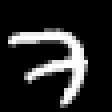

7

10-element Array{Float32,1}:
 0.0040588616
 0.0006992841
 0.059435066
 0.0036682223
 0.045614187
 0.0031717326
 0.013208977
 0.7564537
 0.03998523
 0.07370473

In [36]:
i = 5001
display(images[i])
display(labels[i])
model(preprocess(images[i]))

In [37]:
prediction(i) = findmax(model(preprocess(images[i])))[2]-1 # returns (max_value, index)

prediction (generic function with 1 method)

In [38]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000


0.8782

In [39]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.8634

# VGG 16

In [ ]:
# VGG16 and VGG19 models
function vgg16()
    return Chain(
            Conv((3, 3), 3 => 64, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(64),
            Conv((3, 3), 64 => 64, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(64),
            MaxPool((2,2)),
            Conv((3, 3), 64 => 128, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(128),
            Conv((3, 3), 128 => 128, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(128),
            MaxPool((2,2)),
            Conv((3, 3), 128 => 256, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(256),
            Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(256),
            Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(256),
            MaxPool((2,2)),
            Conv((3, 3), 256 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            MaxPool((2,2)),
            Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
            BatchNorm(512),
            MaxPool((2,2)),
            flatten,
            Dense(512, 4096, relu),
            Dropout(0.5),
            Dense(4096, 4096, relu),
            Dropout(0.5),
            Dense(4096, 10)) |> gpu
end

In [45]:
L(x,y) = Flux.crossentropy(vgg16(x), y)

L (generic function with 1 method)

In [46]:
opt = ADAMW()

Flux.Optimise.Optimiser(Any[ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}()), WeightDecay(0)])

In [47]:
@time Flux.train!(L, params(model), [trainbatch], opt)
# @time Flux.train!(L, params(model), [trainbatch], opt)

  2.517045 seconds (25.84 M allocations: 689.800 MiB, 2.63% gc time)


In [ ]:
Flux.train!(L, params(model), Iterators.repeated(trainbatch, 100), opt;
            cb = Flux.throttle(show_loss, 1))

train loss = 2.249, test loss = 2.251
train loss = 2.081, test loss = 2.082
train loss = 1.936, test loss = 1.938
train loss = 1.794, test loss = 1.797
train loss = 1.656, test loss = 1.662
train loss = 1.527, test loss = 1.537
train loss = 1.408, test loss = 1.423
train loss = 1.297, test loss = 1.315
train loss = 1.194, test loss = 1.216
train loss = 1.099, test loss = 1.125
train loss = 1.012, test loss = 1.042
train loss = 0.935, test loss = 0.968
train loss = 0.865, test loss = 0.901
train loss = 0.802, test loss = 0.841
train loss = 0.746, test loss = 0.787
train loss = 0.695, test loss = 0.739
train loss = 0.651, test loss = 0.696
train loss = 0.611, test loss = 0.658
train loss = 0.576, test loss = 0.625
train loss = 0.545, test loss = 0.596
train loss = 0.517, test loss = 0.570
train loss = 0.492, test loss = 0.547
train loss = 0.470, test loss = 0.527


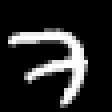

7

10-element Array{Float32,1}:
 0.0040588616
 0.0006992841
 0.059435066
 0.0036682223
 0.045614187
 0.0031717326
 0.013208977
 0.7564537
 0.03998523
 0.07370473

In [36]:
i = 5001
display(images[i])
display(labels[i])
model(preprocess(images[i]))

In [37]:
prediction(i) = findmax(model(preprocess(images[i])))[2]-1 # returns (max_value, index)

prediction (generic function with 1 method)

In [38]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000


0.8782

In [39]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.8634